In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(32, activation= "relu")(input_deep)
hidden2 = keras.layers.Dense(32, activation= "relu")(hidden1)
concat = keras.layers.concatenate([hidden2, input_wide])
output = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)

model = keras.models.Model(inputs= [input_wide, input_deep], outputs= [output, output2])
model.summary()
model.compile(loss="mean_squared_error", optimizer="sgd", metrics=['mae'])
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-2)]

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 32)           224         input_2[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 32)           1056        dense[0][0]                      
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 5)]          0                                            
______________________________________________________________________________________________

In [6]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]
history = model.fit([x_train_scaled_wide, x_train_scaled_deep], 
                    [y_train, y_train],
                    validation_data = (
                        [x_valid_scaled_wide, x_valid_scaled_deep], 
                        [y_valid, y_valid]
                    ),
                    epochs = 100,
                    callbacks = callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 280us/sample - loss: 2.4306 - dense_2_loss: 0.8500 - dense_3_loss: 1.6829 - dense_2_mae: 0.6321 - dense_3_mae: 0.7569 - val_loss: 22.9035 - val_dense_2_loss: 2.2787 - val_dense_3_loss: 20.6201 - val_dense_2_mae: 1.1248 - val_dense_3_mae: 3.4456
Epoch 2/100
11610/11610 [==============================] - 1s 80us/sample - loss: 1.4147 - dense_2_loss: 0.5293 - dense_3_loss: 0.8850 - dense_2_mae: 0.5159 - dense_3_mae: 0.6559 - val_loss: 1.1485 - val_dense_2_loss: 0.4902 - val_dense_3_loss: 0.6582 - val_dense_2_mae: 0.5056 - val_dense_3_mae: 0.5817
Epoch 3/100
11610/11610 [==============================] - 1s 62us/sample - loss: 1.0652 - dense_2_loss: 0.4527 - dense_3_loss: 0.6123 - dense_2_mae: 0.4809 - dense_3_mae: 0.5649 - val_loss: 1.0597 - val_dense_2_loss: 0.4587 - val_dense_3_loss: 0.6008 - val_dense_2_mae: 0.4904 - val_dense_3_mae: 0.5627
Epoch 4/100
11610/11610 [===========

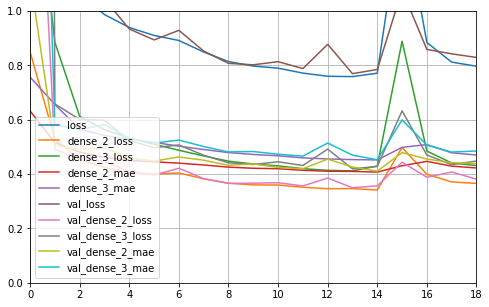

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
plot_learning_curves(history)

In [8]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], [y_test, y_test])

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.8434661344040272, 0.40048358, 0.4450255, 0.43699402, 0.47966442]